In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [3]:
%matplotlib inline

In [4]:
import matplotlib

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# matplotlib.use()     to change backend

In [7]:
matplotlib.__version__

'3.0.2'

In [8]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [9]:
plt.ion()
plt.isinteractive()

True

In [10]:
import requests 
resp = requests.get("https://restcountries.eu/rest/v2/all")
countries = pd.DataFrame(resp.json())

In [11]:
persons = pd.read_csv("persons.txt")
sales = pd.read_csv("booksales.txt")

In [12]:
persons

,Name,Age,Weight,Height,Income,Gender,Exp,Country
0,Herbert,65,75,5.11,550000,M,30,US
1,Mike,35,75,5.10,250000,M,5,AU
2,Micheal,40,65,5.10,200000,M,10,US
3,Judy,25,65,5.80,150000,F,1,UK
4,Cathy,50,68,5.70,230000,F,20,UK
5,Jason,32,78,6.20,350000,M,7,AU
6,Lisa,50,56,5.50,200000,F,25,US
7,Mark,40,70,5.11,350000,M,17,AU
8,Ammy,28,50,5.60,220000,F,5,UK
9,Jack,31,78,6.20,250000,M,7,US


In [13]:
sales

,Month,Book,City,Units
0,1,B100,VZG,10
1,2,B100,VZG,4
2,3,B100,VZG,13
3,1,B100,HYD,30
4,2,B100,HYD,40
5,3,B100,HYD,10
6,1,B200,VZG,14
7,1,B200,HYD,10
8,2,B200,HYD,15
9,3,B200,VZG,4


# Line Graph

In [14]:
# Graph for total no. of units sold for each month
df = sales.groupby("Month").sum()

In [15]:
df

,Units
Month,
1,64
2,59
3,41


(0, 100)

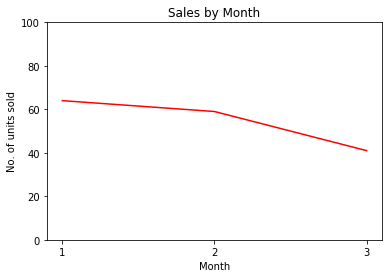

In [16]:
plt.plot(df.index, df.values,'r')
plt.xlabel("Month")
plt.ylabel("No. of units sold")
plt.title("Sales by Month")
plt.xticks([1,2,3])
plt.ylim( (0,100))

In [17]:
# Graph of avg income per country
df = persons.groupby("Country")['Income'].mean()

In [18]:
df

Country
AU    316666.666667
UK    200000.000000
US    300000.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Income By Countries')

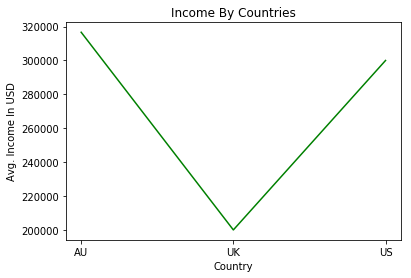

In [19]:
plt.plot(df.index, df.values,'g')
plt.xlabel("Country")
plt.ylabel("Avg. Income In USD")
plt.title("Income By Countries")

In [20]:
vzg_sales = sales.loc[ sales['City'] == 'VZG', ['Month','Units']].groupby('Month').sum()
hyd_sales = sales.loc[ sales['City'] == 'HYD', ['Month','Units']].groupby('Month').sum()

In [21]:
vzg_sales

,Units
Month,
1,24
2,4
3,17


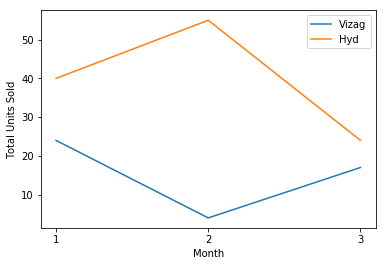

In [22]:
plt.plot([1,2,3], vzg_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.xticks([1,2,3])
# draw sales for hyd
plt.plot([1,2,3], hyd_sales.values)
plt.legend(['Vizag','Hyd'])

In [23]:
df = persons[['Country','Age']].groupby('Country').mean()

Text(0, 0.5, 'Avg. Age')

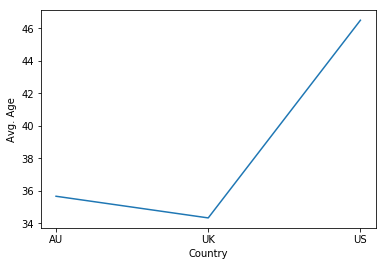

In [24]:
plt.plot(df.index, df.values)
plt.xlabel("Country")
plt.ylabel("Avg. Age")

# Histogram

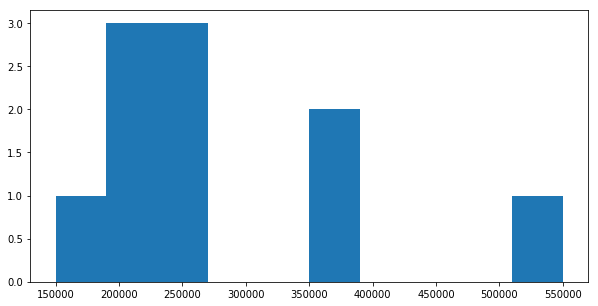

In [30]:
# draw histogram of incomes of the persons
plt.hist( persons['Income'], bins=10)
plt.gcf().set_size_inches(10,5)

(array([43.,  2.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([4.51000000e+02, 1.46603242e+07, 2.93201974e+07, 4.39800706e+07,
        5.86399438e+07, 7.32998170e+07, 8.79596902e+07, 1.02619563e+08,
        1.17279437e+08, 1.31939310e+08, 1.46599183e+08]),
 <a list of 10 Patch objects>)

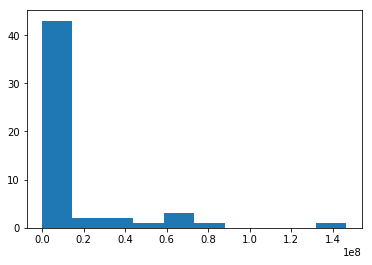

In [35]:
population = countries.loc[countries['region'] == 'Europe','population']
plt.hist(population)

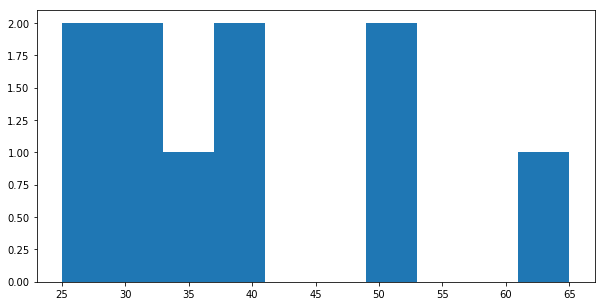

In [52]:
population = countries['population'].sort_values(ascii
plt.hist(population)

# Pie chart of monthly sales

In [37]:
monthly_sales = sales.groupby('Month')['Units'].sum()
monthly_sales

Month
1    64
2    59
3    41
Name: Units, dtype: int64

([<matplotlib.patches.Wedge at 0x18980d6ce48>,
 [Text(0.3718186135310502, 1.035254035795972, '1'),
  Text(-0.9949506119612583, -0.46911968596288695, '2'),
  Text(0.7778174593052022, -0.7778174593052025, '3')],
 [Text(0.20281015283511827, 0.5646840195250756, '39.02'),
  Text(-0.54270033379705, -0.25588346507066556, '35.98'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00')])

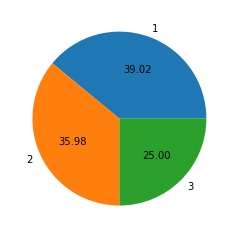

In [39]:
plt.pie(monthly_sales.values, labels= monthly_sales.index, autopct='%5.2f')

## Bar Graph for total sales for each book 

In [40]:
ts = sales.groupby('Book')["Units"].sum()

In [41]:
ts

Book
B100    107
B200     57
Name: Units, dtype: int64

Text(0.5, 1.0, 'Units sold per book')

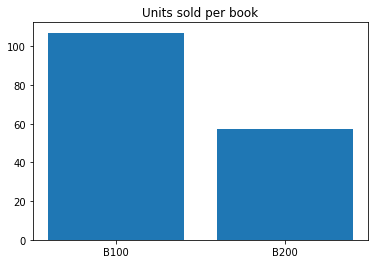

In [43]:
plt.bar(x=ts.index, height= ts.values)
plt.title("Units sold per book")

In [49]:
sales

,Month,Book,City,Units
0,1,B100,VZG,10
1,2,B100,VZG,4
2,3,B100,VZG,13
3,1,B100,HYD,30
4,2,B100,HYD,40
5,3,B100,HYD,10
6,1,B200,VZG,14
7,1,B200,HYD,10
8,2,B200,HYD,15
9,3,B200,VZG,4


In [55]:
# Prepare data
b100 = sales.loc[sales['Book'] == 'B100', : ].groupby('Month').sum()
b200 = sales.loc[sales['Book'] == 'B200', : ].groupby('Month').sum()
b100

,Units
Month,
1,40
2,44
3,23


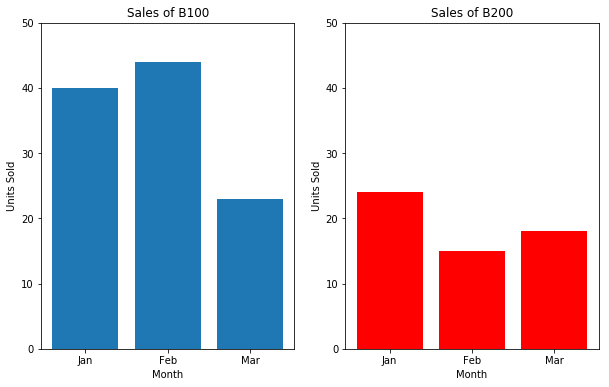

In [77]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,6)
#print(b100.index)
#print(b100['Units'])
ax[0].bar(x=b100.index, height=b100['Units'])
ax[0].set_title("Sales of B100")

ax[1].bar(x=b200.index, height=b200['Units'] , color='r')
ax[1].set_title("Sales of B200")

for n in range(0,2):
   ax[n].set_ylim((0,50))
   ax[n].set_xticks( (1,2,3))
   ax[n].set_xticklabels( ('Jan','Feb',"Mar"))    
   ax[n].set_ylabel("Units Sold")
   ax[n].set_xlabel("Month")


### Multiple bars in bar graph

In [81]:
s = pd.crosstab( sales['Book'], sales["City"], sales["Units"] , aggfunc=np.sum)
s

City,HYD,VZG
Book,,
B100,80,27
B200,39,18


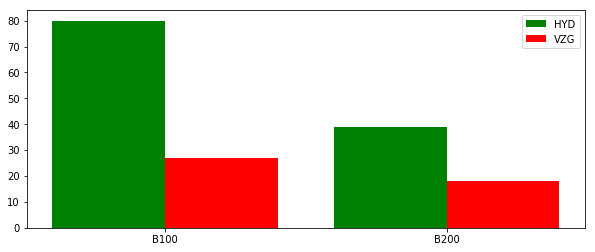

In [80]:
ind = np.arange(len(s.index))
width = 0.40  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.bar(ind - width/2, s["HYD"] , width,  color='Green', label='HYD')
ax.bar(ind + width/2, s['VZG'], width,  color='Red', label='VZG')
ax.set_xticks(ind)
ax.set_xticklabels(s.index)
ax.legend()

## Stacked Bar Graph

In [60]:
s

City,HYD,VZG
Book,,
B100,80,27
B200,39,18


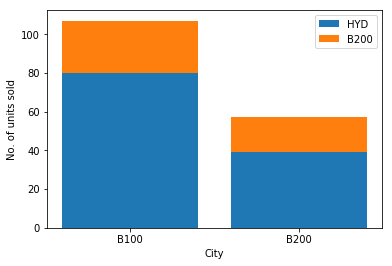

In [61]:
ax = plt.subplot()
ax.bar(x=s.index, height=s['HYD'],label="HYD")
ax.bar(x=s.index, height=s['VZG'], bottom = s["HYD"], label="B200" )
ax.set_xlabel("City")
ax.set_ylabel("No. of units sold")
ax.legend()

## Watermark

In [62]:
df = sales[['Month','Units']].groupby("Month").sum()

In [63]:
df

,Units
Month,
1,64
2,59
3,41


Text(1,50,'Srikanth Technologies')

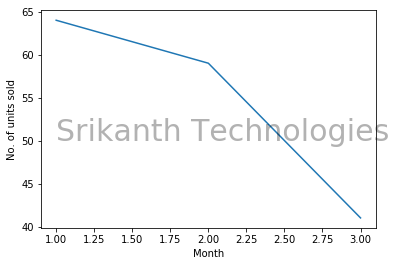

In [76]:
ax = plt.subplot()
ax.plot(df.index, df.values)
ax.set_xlabel("Month")
ax.set_ylabel("No. of units sold")
ax.text(1,50,"Srikanth Technologies", fontsize="30", alpha=0.3)

## Draw Scatter plot with regression line 

In [79]:
df = pd.read_csv("Admission.csv")

In [80]:
df = df.loc[:,  ['GRE Score','TOEFL Score']].tail(20)

In [81]:
X = df['GRE Score']
Y = df['TOEFL Score']

In [82]:
X

480    321
481    323
482    328
483    304
484    317
485    311
486    319
487    327
488    322
489    302
490    307
491    297
492    298
493    300
494    301
495    332
496    337
497    330
498    312
499    327
Name: GRE Score, dtype: int64

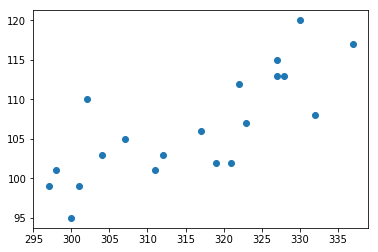

In [225]:
plt.scatter(x=df['GRE Score'], y=df['TOEFL Score'])

In [226]:
from scipy import stats

In [227]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["GRE Score"], df['TOEFL Score'])

In [228]:
line = slope * X + intercept

In [229]:
line

480    108.741006
481    109.575675
482    111.662348
483    101.646319
484    107.071668
485    104.567661
486    107.906337
487    111.245014
488    109.158341
489    100.811650
490    102.898323
491     98.724977
492     99.142312
493     99.976981
494    100.394315
495    113.331686
496    115.418359
497    112.497017
498    104.984995
499    111.245014
Name: GRE Score, dtype: float64

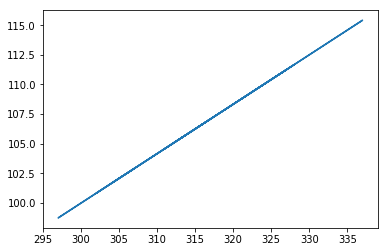

In [230]:
plt.plot(X,line)

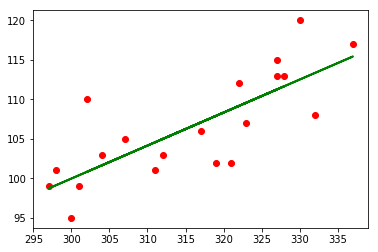

In [231]:
plt.plot(X,Y,'ro',X,line, 'g', linewidth=2)   # format is x,y, format, x,y,format , **kwargs

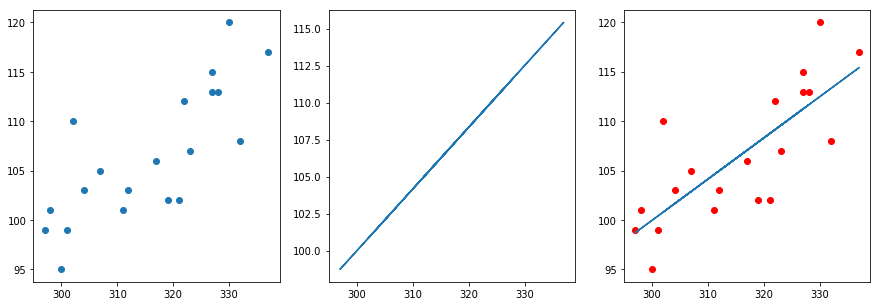

In [232]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
ax[0].scatter(X,Y)
ax[1].plot(X,line)
ax[2].plot(X,Y,'ro', X,line)

## Box plot

Text(0,0.5,'Salary PA')

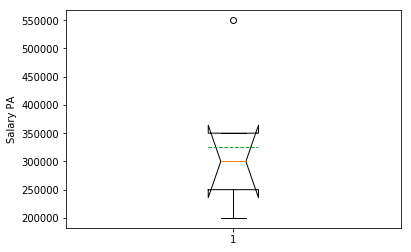

In [91]:
ax = plt.subplot()
salaries = persons.loc[ persons['Gender'] == 'M', 'Income']
ax.boxplot( salaries, meanline=True, notch=True, showmeans=True)
ax.set_ylabel("Salary PA")

Text(0,0.5,'Salary PA')

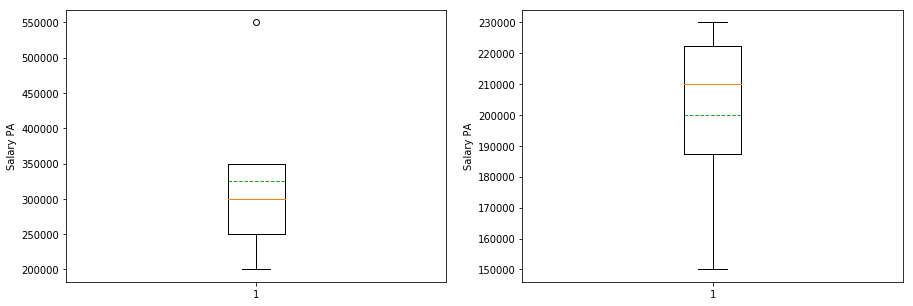

In [110]:
# Distribution of male salary and female salary
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
msalaries = persons.loc[ persons['Gender'] == 'M', 'Income']
fsalaries = persons.loc[ persons['Gender'] == 'F', 'Income']
ax[0].boxplot(msalaries, meanline=True,  showmeans=True)
ax[1].boxplot( fsalaries, meanline=True,  showmeans=True)
ax[0].set_ylabel("Salary PA")
ax[1].set_ylabel("Salary PA")